# Particle filtering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

In [21]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

np.set_printoptions(suppress=True, precision=4)

* Recursive Bayesian filtering by MC simulations

> They key idea is to represent the required posterior density function by a set of random samples with associated weights and to compute estimates based on these samples and weights

## Importance sampling

$$
\begin{aligned}
    \mathbb{E}[g(x) \vert {\bf y}] &\approx \frac{1}{N}\sum_{n=1}^N \frac{p(x^{(i)} \vert {\bf y})}{\pi(x^{(i)} \vert {\bf y})} g(x^{(i)} \vert {\bf y})\\
    &= \sum_{n=1}^N \tilde w^{(i)} g(x^{(i)} \vert {\bf y}),
\end{aligned}
$$

where 
$$
    \tilde w^{(i)} = \frac{p(x^{(i)} \vert {\bf y})}{N \pi(x^{(i)} \vert {\bf y})}
$$

In [150]:
# importance distribution
pi_dist = norm(0, 2)
# target distribution
p_dist = t(4, 0)

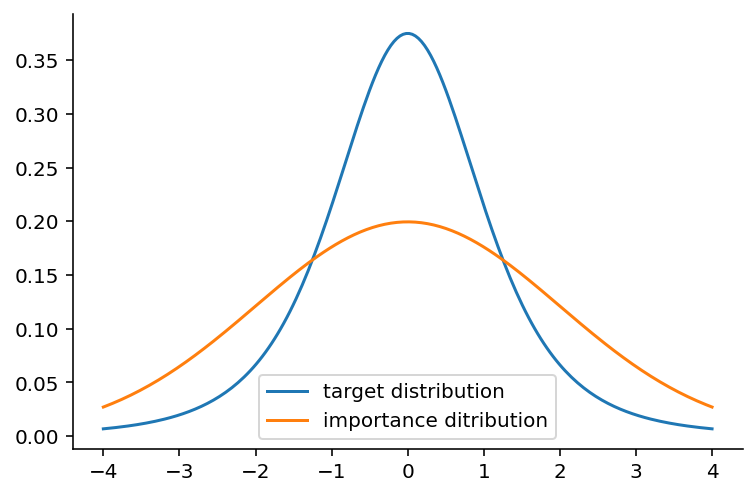

In [151]:
xrange = np.linspace(-4, 4, 200)
plt.plot(xrange, p_dist.pdf(xrange), label="target distribution")
plt.plot(xrange, pi_dist.pdf(xrange), label="importance ditribution")
plt.legend()

In [166]:
np.random.seed(314)
N = 100
# samples from the importance distribution
x_rvs = pi_dist.rvs(N)
# Samples from the target distribution
p_rvs = p_dist.rvs(N)

In [167]:
weights = p_dist.pdf(x_rvs) / (N * pi_dist.pdf(x_rvs))

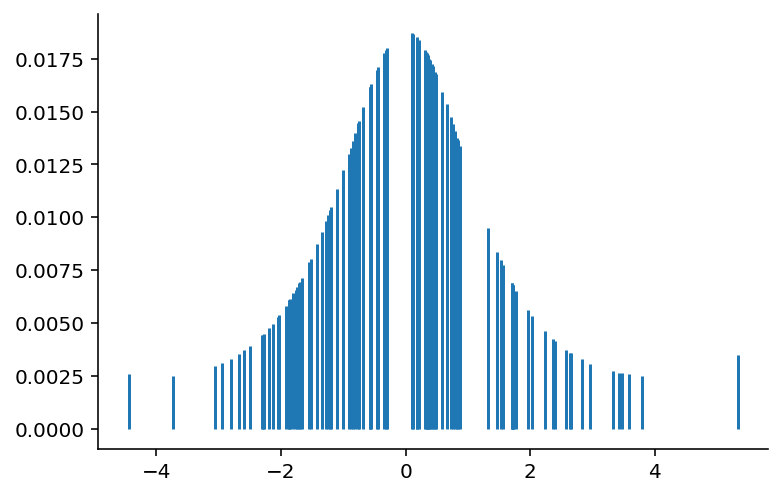

In [168]:
for xi, wi in zip(x_rvs, weights):
    plt.vlines(xi, 0, wi)

In [179]:
def g(x): return x ** 2

In [180]:
(weights * g(x_rvs)).sum()

1.6542189530195281

In [181]:
g(p_rvs).mean()

2.0109239264713437

> The disadvantage of direct importance sampling is that we should be able to evaluate $p(x^{(i)} \vert {\bf y})$ in order to use it directly.

That is, we need to compute
$$
    p(x^{(i)} \vert {\bf y}) = \frac{p(x^{(i)}) p({\bf y} \vert x^{(i)})}{\int p(x) p({\bf y} \vert x) dx},
$$

where the marginal likelihood may be difficult to compute.